[View in Colaboratory](https://colab.research.google.com/github/yooseonghwan/OpenDataWrangling/blob/master/02_%EC%83%81%EA%B0%80_%EC%97%85%EC%86%8C_%EC%A0%95%EB%B3%B4_2018_teacher.ipynb)

# 공공데이터 상권정보 분석해 보기
* https://www.data.go.kr/dataset/15012005/fileData.do
* 국가중점데이터인 상권정보를 살펴봅니다.
* 처음으로 파일데이터에서 상권별 업종밀집통계정보를 다운로드 받아봅니다.

In [49]:
!pip install plotnine

In [0]:
import pandas as pd
from plotnine import *

In [51]:
# 그래프에서 한글표현을 위해 폰트를 설치합니다.
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

from plotnine import *
import plotnine

In [0]:
# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

# 상가업소정보 2018년 6월

In [53]:
# 상가업소정보 2018년 6월 데이터
shop_201709_01 = pd.read_csv('https://s3.ap-northeast-2.amazonaws.com/todaycodes/shop_201806_01.csv', encoding='cp949')
shop_201709_01.shape

(476183, 39)

In [54]:
shop_201709_01.head(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,28523551,엘가커피부산아시아드점,부산아시아드점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2647010100111980000009422,부산아시아드주경기장노외주차장,부산광역시 연제구 종합운동장로 7,611070,47500.0,NaN,1,NaN,129.062034,35.191284
1,28498271,비비안아울렛중계점,아울렛중계점,D,소매,D05,의복의류,D05A07,셔츠/내의/속옷,NaN,...,1135010600105090000010511,2001아울렛,서울특별시 노원구 동일로204가길 46,139726,1783.0,NaN,3,NaN,127.067888,37.641280
2,28512174,연세정신건강의학과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,1111017400102990000005842,유림문화사,서울특별시 종로구 종로 335-3,110540,3104.0,NaN,2,NaN,127.014500,37.573196


In [55]:
shop_201709_01.tail(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
476180,16153984,SK텔레콤,빌아트,D,소매,D02,선물/팬시/기념품,D02A08,관광/민예품/선물용품소매,G47842,...,2623010900107680003031155,NaN,부산광역시 부산진구 백양순환로 54,614823,47142.0,NaN,2,NaN,129.033528,35.169555
476181,16154291,대한부동산공인중개사사무소,NaN,L,부동산,L01,부동산중개,L01A01,부동산중개,L68221,...,2626010100100610023022917,NaN,부산광역시 동래구 명안로85번길 37,607808,47772.0,NaN,1,NaN,129.102508,35.204353
476182,16154269,서울부동산공인중개사사무소,NaN,L,부동산,L01,부동산중개,L01A01,부동산중개,L68221,...,1120011300104280000010286,옥수동극동아파트,서울특별시 성동구 독서당로 187,133766,4732.0,NaN,NaN,247,127.011869,37.542674


In [56]:
# 생각보다 결측치가 많다.
shop_201709_01.isnull().sum()

상가업소번호            0
상호명               1
지점명          416061
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      27664
표준산업분류명       27664
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         80599
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        413186
건물관리번호            0
건물명          265997
도로명주소             0
구우편번호             0
신우편번호             9
동정보          433303
층정보          184584
호정보          405945
경도                0
위도                0
dtype: int64

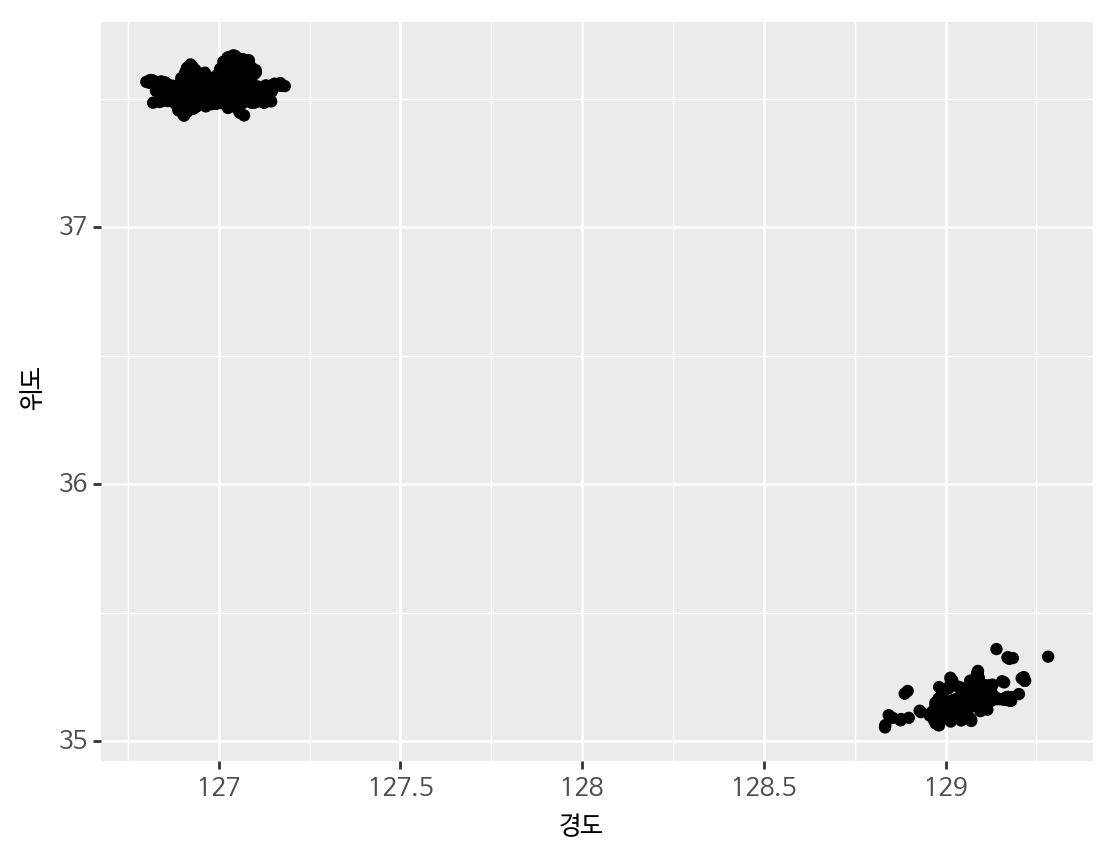

<ggplot: (-9223363248152100762)>

In [57]:
# 모든 데이터를 한번에 찍으면 너무 오래 걸려서 1000개만 찍어봅니다.
# 양쪽에 데이터가 몰려있는데 왜 그런지 주소 정보를 다시보겠습니다.
(ggplot(shop_201709_01[:1000])
 + aes(x='경도', y='위도')
 + geom_point()
 + theme(text=element_text(fontproperties=font))
)


In [58]:
# 데이터를 보니 서울과 부산만 있는거 같다. 
# 그래서 서울과 그 외 데이터로 나눠봤다.
shop_seoul = shop_201709_01.loc[shop_201709_01['도로명주소'].str.startswith('서울')]
shop_except_seoul = shop_201709_01.loc[~shop_201709_01['도로명주소'].str.startswith('서울')]
print(shop_seoul.shape)
print(shop_except_seoul.shape)

(330089, 39)
(146094, 39)


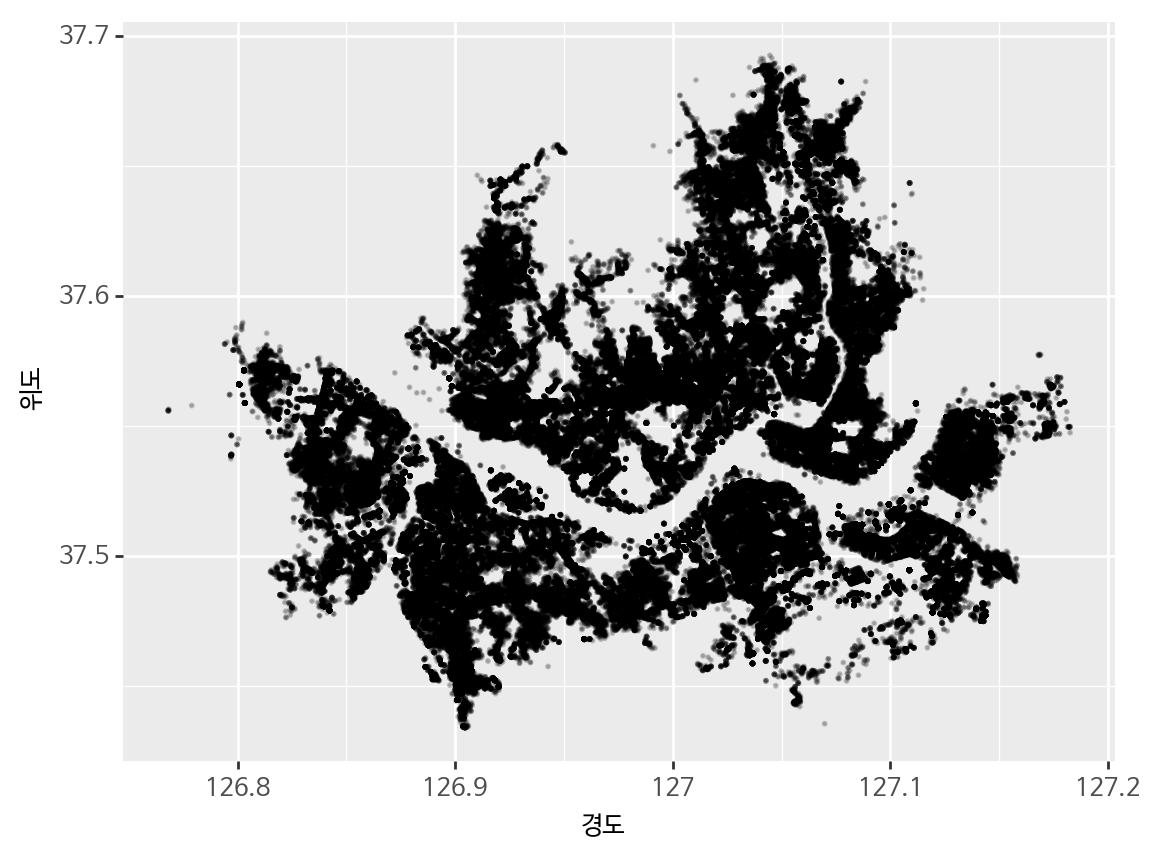

<ggplot: (-9223363248158720361)>

In [59]:
# 서울만 찍어봤더니 서울지도 비슷하게 나온다
(ggplot(shop_seoul)
 + aes(x='경도', y='위도')
 + geom_point(color='black', alpha=0.2, size=0.2)
 + theme(text=element_text(fontproperties=font))
)


In [60]:
print(shop_201709_01.shape)
shop_201709_01['시도'] = shop_201709_01['도로명주소'].str.split(' ', expand=True)[0]
shop_201709_01['구군'] = shop_201709_01['도로명주소'].str.split(' ', expand=True)[1]
print(shop_201709_01.shape)
shop_201709_01.columns

(476183, 39)
(476183, 41)


Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도', '시도', '구군'],
      dtype='object')

In [61]:
# 서울만 찍어봤더니 서울지도 비슷하게 나온다
# 서울 DF을 다시 만들어 준다.
shop_seoul = shop_201709_01.loc[shop_201709_01['도로명주소'].str.startswith('서울')]
shop_seoul.shape

(330089, 41)

/usr/local/lib/python3.6/dist-packages/plotnine/guides/guides.py:200: UserWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it
  "variable to it".format(output))


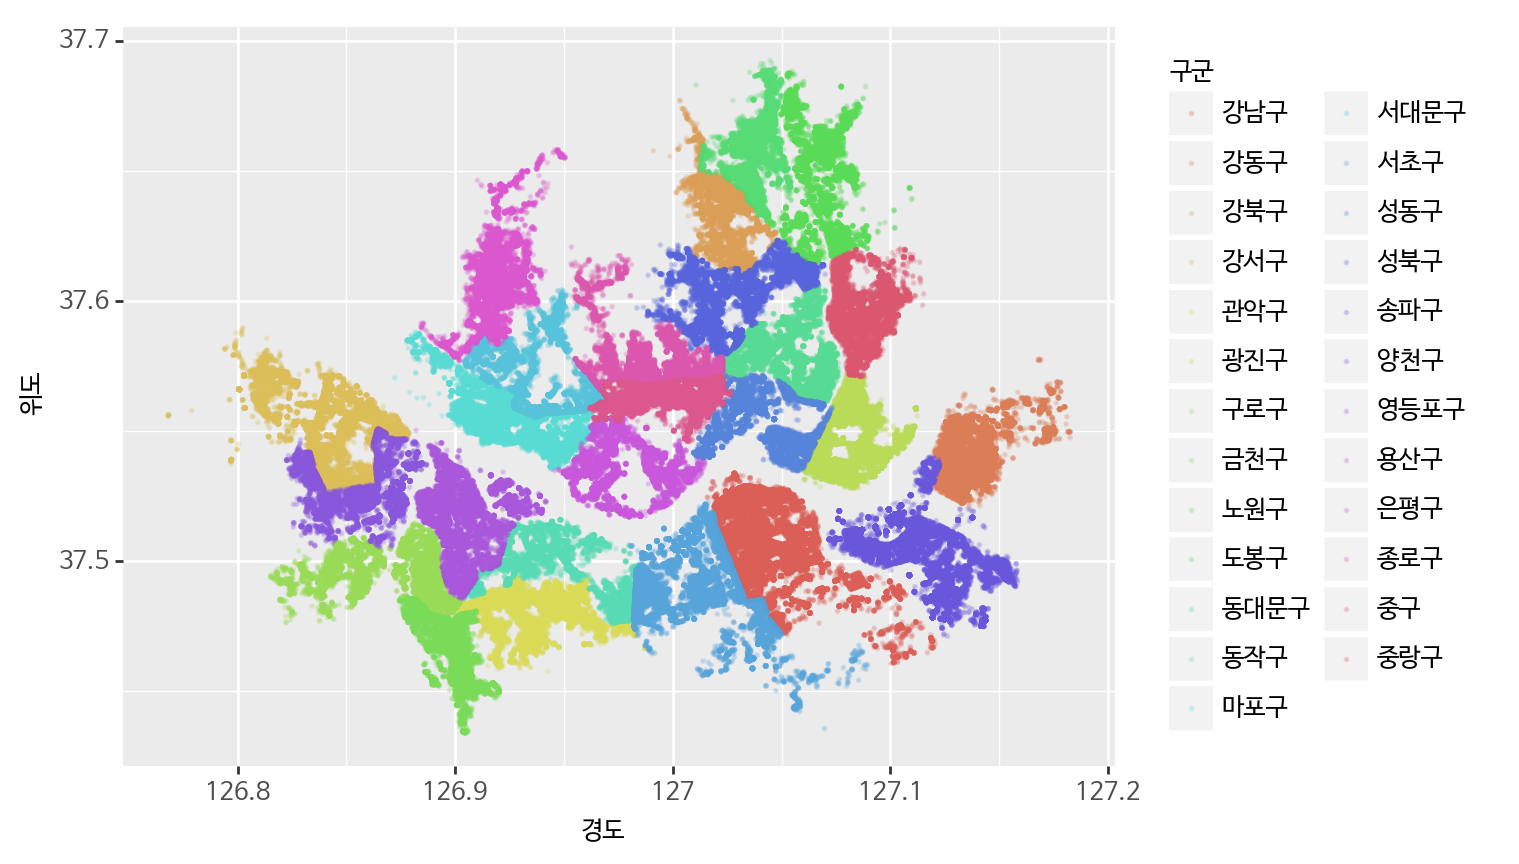

<ggplot: (8788696055409)>

In [62]:
(ggplot(shop_seoul)
 + aes(x='경도', y='위도', color='구군')
 + geom_point(alpha=0.2, size=0.2)
 + theme(text=element_text(fontproperties=font))
 + scale_fill_gradient(low = 'blue', high = 'green') 
)

In [63]:
shop_seoul['상권업종대분류명'].value_counts()

음식          109766
소매          101297
생활서비스        52728
학문/교육        26294
의료           15144
부동산          12905
관광/여가/오락      9165
숙박            2744
스포츠             46
Name: 상권업종대분류명, dtype: int64

/usr/local/lib/python3.6/dist-packages/plotnine/guides/guides.py:200: UserWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it
  "variable to it".format(output))


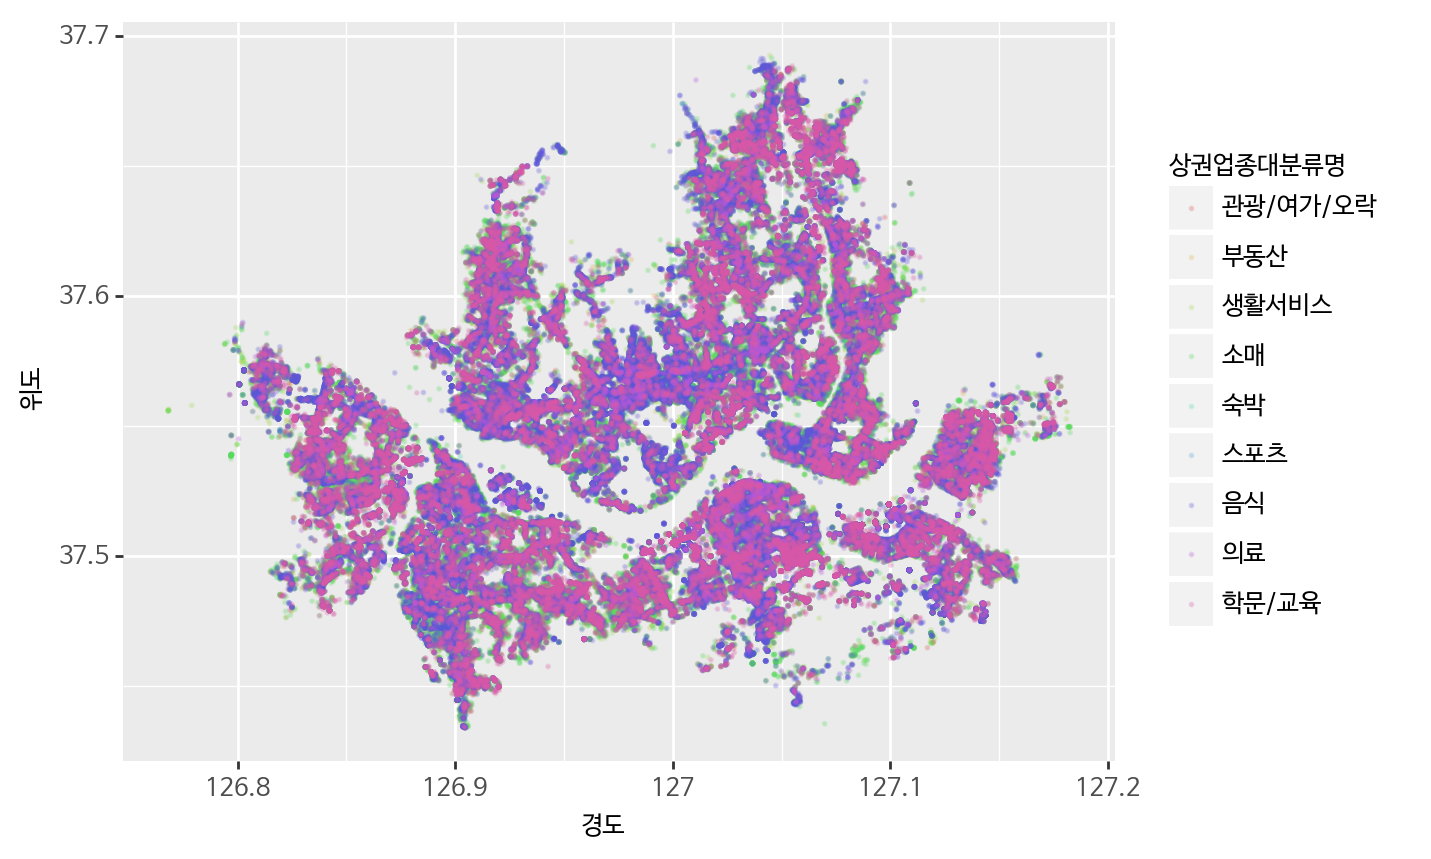

<ggplot: (-9223363248121507766)>

In [64]:
(ggplot(shop_seoul)
 + aes(x='경도', y='위도', color='상권업종대분류명')
 + geom_point(alpha=0.2, size=0.2)
 + theme(text=element_text(fontproperties=font))
 + scale_fill_gradient(low = 'blue', high = 'green') 
)

## 학문/교육과 관련된 지도 보기

/usr/local/lib/python3.6/dist-packages/plotnine/guides/guides.py:200: UserWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it
  "variable to it".format(output))


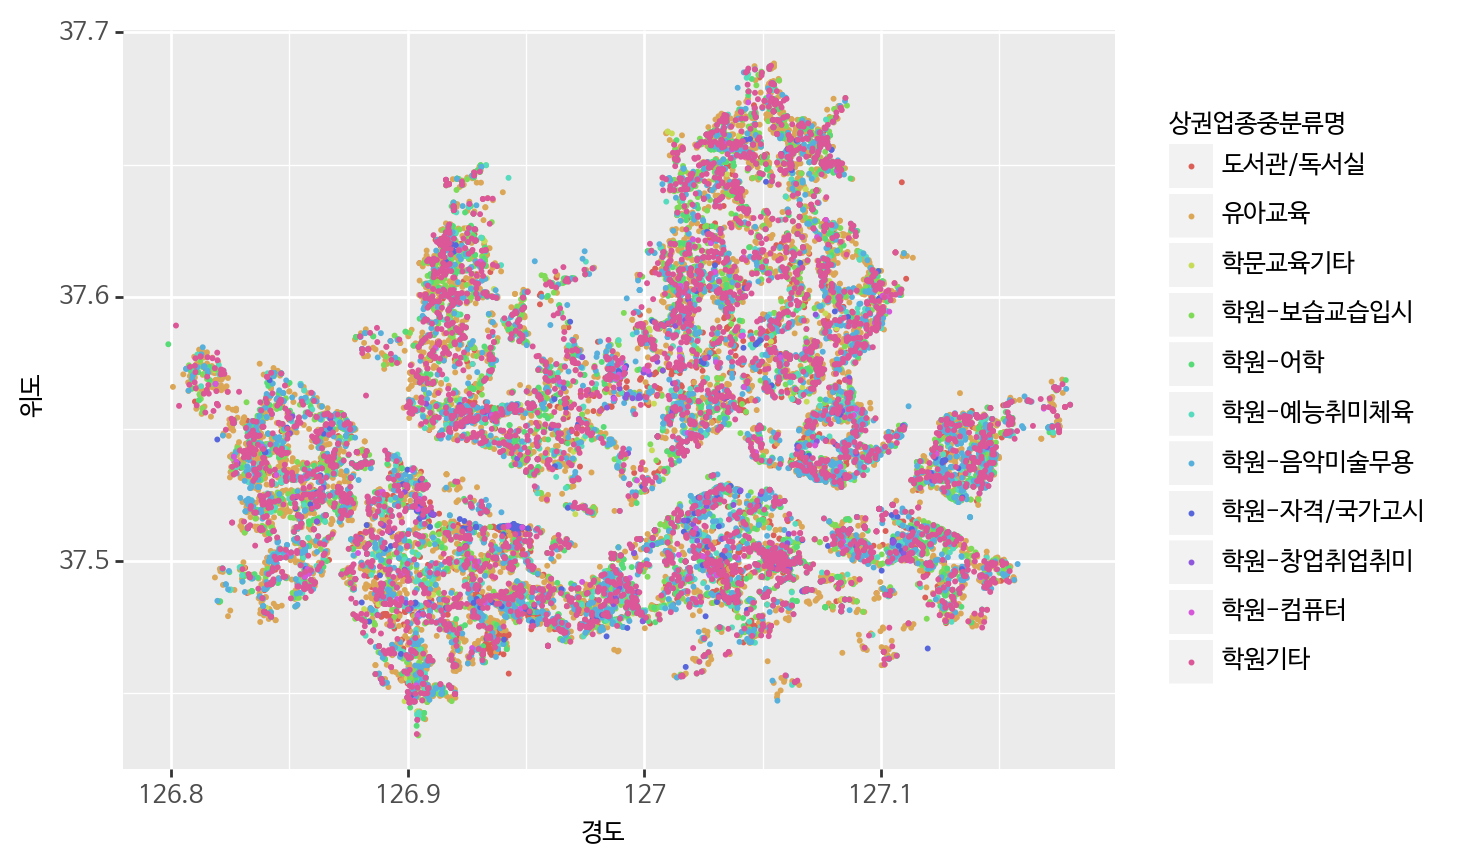

<ggplot: (-9223363248111422923)>

In [65]:
shop_seoul_edu = shop_seoul.loc[shop_seoul['상권업종대분류명'] == '학문/교육']

(ggplot(shop_seoul_edu)
 + aes(x='경도', y='위도', color='상권업종중분류명')
 + geom_point(size=0.2)
 + theme(text=element_text(fontproperties=font))
 + scale_fill_gradient(low = 'blue', high = 'green') 
)

/usr/local/lib/python3.6/dist-packages/plotnine/guides/guides.py:200: UserWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it
  "variable to it".format(output))


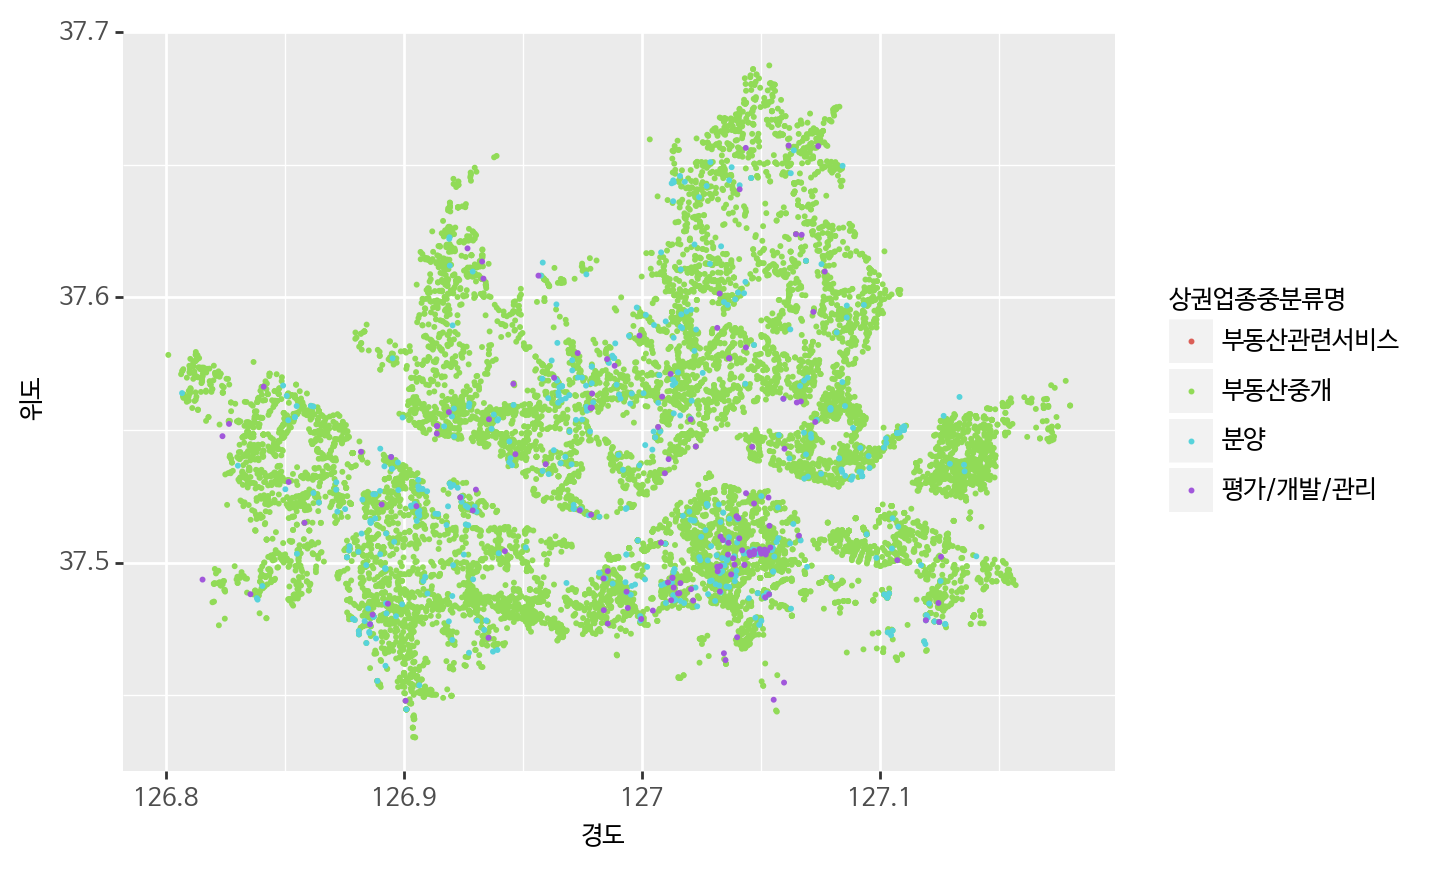

<ggplot: (8788692465882)>

In [66]:
shop_seoul_edu = shop_seoul.loc[shop_seoul['상권업종대분류명'] == '부동산']

(ggplot(shop_seoul_edu)
 + aes(x='경도', y='위도', color='상권업종중분류명')
 + geom_point(size=0.2)
 + theme(text=element_text(fontproperties=font))
 + scale_fill_gradient(low = 'blue', high = 'green') 
)

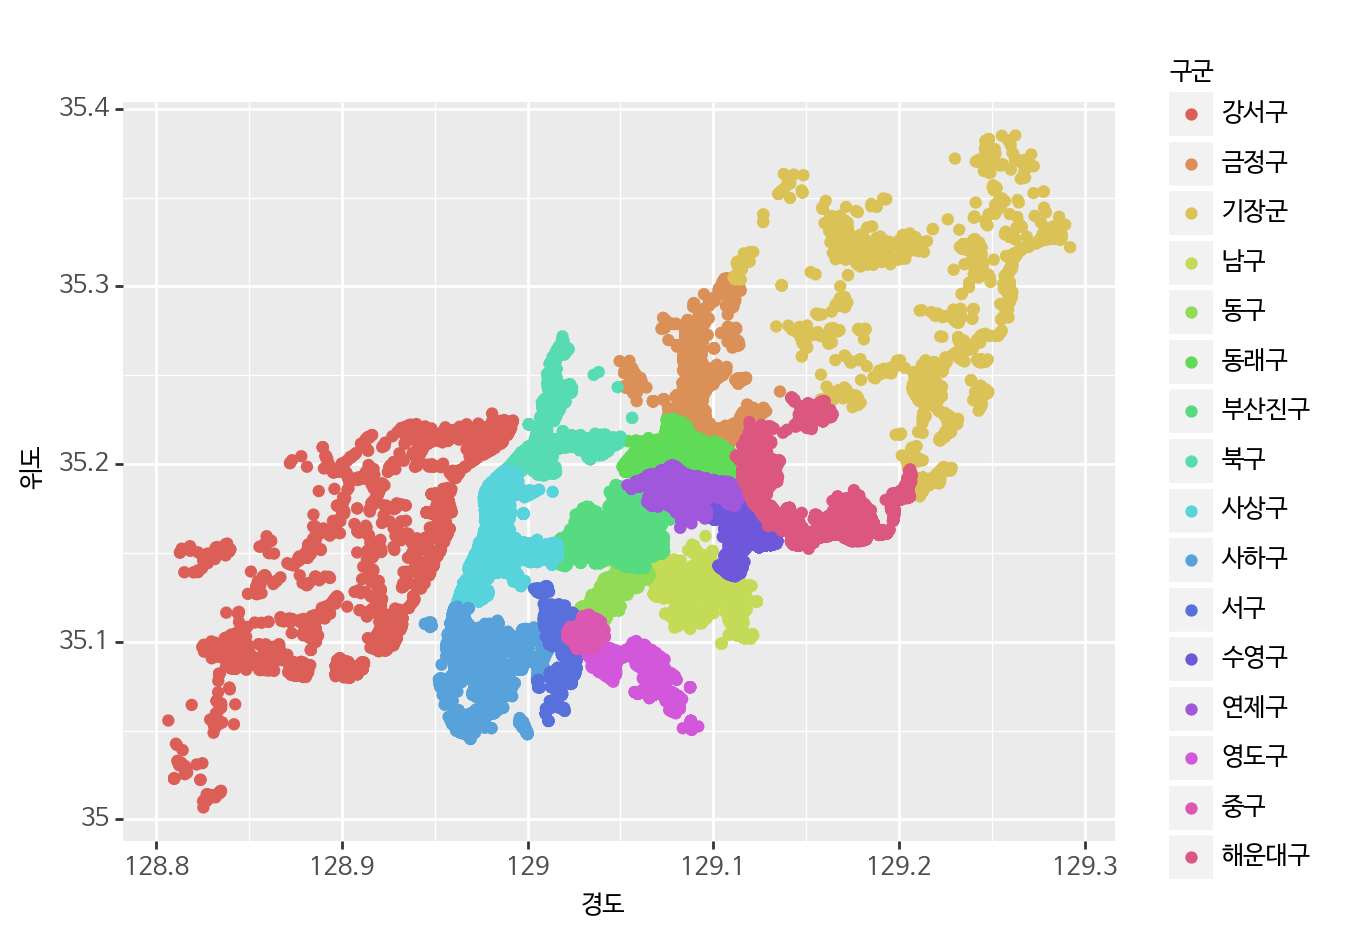

<ggplot: (8788696037366)>

In [67]:
# 부산만 있는거 같습니다.
# 서울만 제외한 나머지 지역으로 DF을 다시 생성해 줍니다.
shop_except_seoul = shop_201709_01.loc[~shop_201709_01['도로명주소'].str.startswith('서울')]
(ggplot(shop_except_seoul)
 + aes(x='경도', y='위도', color='구군')
 + geom_point()
 + theme(text=element_text(fontproperties=font))
)